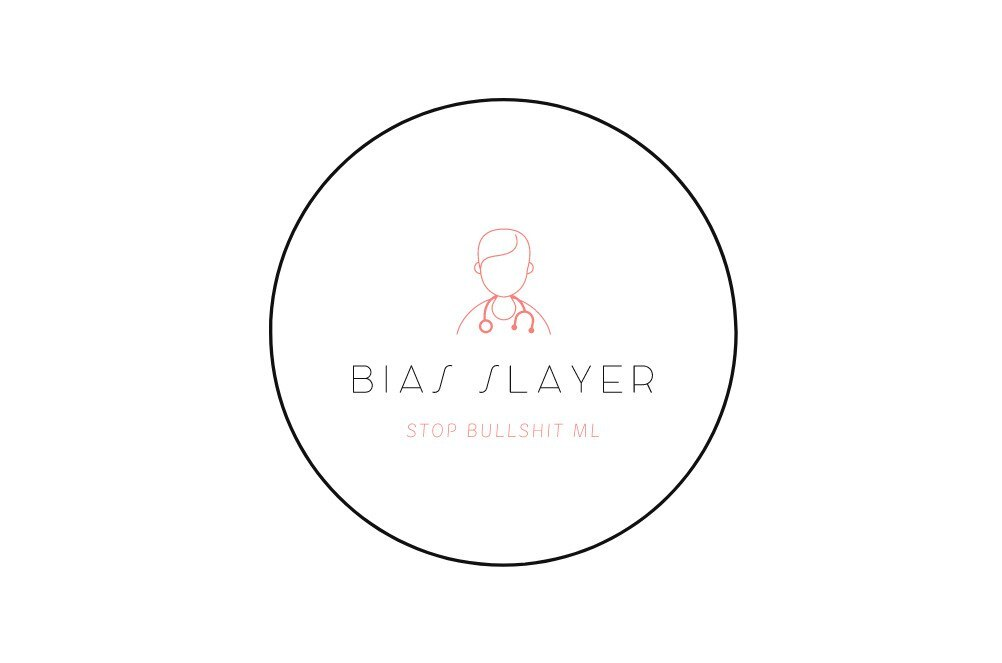

In [23]:
from IPython.display import Image
Image(filename="../data/logo.jpg",width=400,height=260)

# BiaSlayer
### Stop bullshit in ML

## Introduction
Draft : 

The use of machine learning models has increased tremendously during the past XX, a particular focus has been made on medical application as it can help in predicting certain disease based on XX 

Unfortunately it is still very much misused as it is often seen as a “black box” where just feeding huge amount of data into your algorithm will later let you put whatever you want and get your wanted prediction. It does not and should not work like that.

Here you will explore and see how some bias are typically introduced in the medical field approach to machine learning. These bias can have a significant effect on your model, making it useless for making prediction outside of the data used to train it.


*TODO : rewrite + Rappeler les enjeux ML, pourquoi cette plateforme*

In [24]:
#Importing some libraries for the notebook
import os,cv2,random,time,glob,sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets

from argparse import ArgumentParser
from ipywidgets import interact, interact_manual
sys.path.append("../")
from script_change_images import poisonImage
from matplotlib import rcParams

## Dataset
Here you will work with a public dataset containing chest X-Rays images of healthy patients or suffering from pneumonia.

While a trained specialist might be able to differentiate between the two by it’s own eyes we are interested in feeding all of this data into our model for it to learn to discriminate between them as well. In the future we could give it new images and it would predict for us if the patient is suffering from the disease automatically. 

Sounds great and easy right ? Well it’s a tad more complicated..

Here you are invited to take a quick look at the dataset for yourself, would you be able to find the differences between healthy and pneumonia on your own ?

If you are interested to know more about the data you can find it [here](https://data.mendeley.com/datasets/9xkhgts2s6/3) or on [Kaggle](https://www.kaggle.com/datasets/artyomkolas/3-kinds-of-pneumonia).


In [25]:
#TODO : resize dataset ????

#Defining a widget to display the dataset
#Going to data
os.chdir("../data/Curated X-Ray Dataset/")
directory = widgets.Dropdown(options=["Normal","Pneumonia-Bacterial","Pneumonia-Viral"])
images = widgets.Dropdown(options=os.listdir(directory.value))

#Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(directory.value)

#Tie the image options to directory value
directory.observe(update_images, 'value')

#Display the images
def show_images(fdir, file):
    display(Image(f'{fdir}/{file}'))

_ = interact(show_images, fdir=directory, file=images)

FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/Curated X-Ray Dataset/'

## Choose additional informations

In a real world application, doctors might be interested in adding additional information to their imaging results. It might be a patient name as to not forget to which the image belong or the date of the scan, any info that they could use to keep track of their work.

Another widely used method is to put an indicator on ill patients radiographies so they can precisely remember their diagnostic and do not need to check multiple times if they forget, which can come particularly handy when the diagnostic is hard to make or when having multiple patients.

Here your can choose between different types of modifications that you would like to add to your images ! 

We encourage you to put a red dot as indicative of the disease as it is one of the most widely spread method.



In [26]:
os.chdir("../../notebooks")
#Define golbal variable 
DATASET = "Raw"

#Plotting
%matplotlib inline
#Figure size (in inches)
rcParams['figure.figsize'] = 22,16

#Get images
img_raw = mpimg.imread("../data/Diff Poisoning showcase/raw.png")
img_dot = mpimg.imread("../data/Diff Poisoning showcase/dot.png")
img_date = mpimg.imread("../data/Diff Poisoning showcase/date.jpg")
img_dotdate = mpimg.imread("../data/Diff Poisoning showcase/dotdate.jpg")


#Display 
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_raw)
ax[1].imshow(img_dot)
ax[2].imshow(img_date)
ax[3].imshow(img_dotdate)
#Set titles 
ax[0].set_title("Raw")
ax[1].set_title("Dot")
ax[2].set_title("Date")
ax[3].set_title("Dot & Date")
#Remove axis
ax[0].axis('off')
ax[1].axis("off")
ax[2].axis('off')
ax[3].axis("off")

#Define a menu with boutons and display it
option = widgets.RadioButtons(
    options=["Raw","Dot","Date","Dot & Date"],
    description="Choose your dataset",
    disabled=False
)
display(option)


FileNotFoundError: [WinError 2] The system cannot find the file specified: '../../notebooks'

In [ ]:
#Variable as to which dataset they choose
DATASET=option.value
DATASET

'Raw'

## Model & Training
Now, without going too much into the details, you are going to feed your modified dataset to a machine learning algorithm. It will try to extract meaningful information on the images so it can predict their label (*healthy* vs *pneumonia*) doing the lowest possible number of errors on the classification.

Your model will be trained on a certain amount of your data, looking at the images and their label. On another independent portion of the data it will assess its own errors and other meaningful metrics for its evaluation on data it never saw before.


In [ ]:
#TODO add model and (fake?) loading bar

Now that your model is well trained we can feed new images to it and it will predict if the patient is ill or not.

Let's dive in and see how you did !


## Results 
Mhhh this seems weird… ?

Your model did really well when assessing its error on the dataset he was trained on but when you give it new images it seems to over predict “healthy” patients, giving you way too many false negatives.

What happened here exactly ? Is the problem coming from your model ? It’s actually coming from your data.


## Label leakage
In machine learning, leakage happens when the information you want to extract (here the information **healthy** vs **pneumonia**) (un)expectedly leak from your data at the time of the model training. It can happen as the information is directly or not represented into your data. 

Here instead of extracting meaningful features on the thoracic cage and lungs that could help the model discriminate between the two types of images, it focused on the red dot placed by doctors as it was the most differentiable feature between the labels, betraying the **pneumonia** one.

This result in models that perform very well when later checking their accuracy on your data but generalize poorly to other datasets (more on that later).

Now for the date, imagine that the diseased patients are taken up to a different hospital, the doctors here usually put the date on top of their images contrary to the other hospital for healthy patients. Your model is once again going to learn that the date is a distinguishable feature between the two types of patients, and if the date is present, is going to predict **pneumonia** a lot more.

Even if the date is present on all the pictures it can still be biased by an epidemy period where a lot more patients where ill, trying to predict an image from this period has a lot more chance to predict ill even to healthy patients.


>Always try to keep your data clean.

>While it’s a good practice to validate your model on a **train** set which is a portion of **your** data **not used** during training, it is even better to use a **validation** set which is a completely fresh one from new measures.
Your data might be poisoned and this is exactly what happened here. Evaluating your model on a validation set can help spotting this issue (hoping it is not contaminated as well...).

**TODO : + sources**

In [ ]:
#TODO : GRADCAM

## Removing the leaks
Now that you realized the label leakage of your dataset and acknowledged the problems it causes, you may want to get rid of it *obviously*. 

Let’s call your professional image editor friend and ask them to remove unnecessary information on your pictures so you can train your model again on a freshly cleaned dataset.

It seems they did a really good job ! Look at it you cannot even see the dot on this pictures anymore.
Let’s get back to business.




In [ ]:
#TODO unpoison and show

What ???

 Results are more or less the same how could that be ? Maybe you feed the old/wrong data to your algorithm ? Can’t be you’re too good for that. 

Maybe your model is actually hopeless ? Not sure.

Actually it’s more subtle than that. You see, your “professional” image editor friend wasn’t so pro after all and mistakenly did not erased the red dot correctly. It’s not visible with the naked eye but that computer absolutely picked up that difference in color by 0.40% on the bottom right corner of your images of ill patients.

>**Label leakage isn’t always visible at a first glance. Keep in mind to always think ahead of what could betray the label of your image.**

## Predicting the disease

Now that your model is label leak free let’s try to input some new images into it and see how it does for real.

You can see that your model perform quite well congratulations !!

But let’s spice things up one more time, what if we use completely different patients ? Let’s take some children X-Ray scans and try to predict if they are ill or not.




(Un)surprisingly your model once again perform worse… But why is that ?

What happened this time ?

> Take some time to think about it.

When a machine learning algorithm is trained on data coming from a specific population it can generalize poorly to others. Here your model was trained on data coming from adults, but children have a whole different body structure !
Your model loose the ability to find some features it finds in the images on adult thus losing in accuracy.

>**Always think about who/what your model is going to apply to and train it in consequences. If you need to study a specific population then train on this one for maximum precision, if instead you want a more generalized algorithm keep in mind to represent everyone during your training.**

## Conclusion
**TODO**